In [ ]:
# This code shows how to use tensorflow for time series forecasting do not use for financial advice.

In [ ]:
 !pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-10-21 20:07:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.002s  

2024-10-21 20:07:10 (70.0 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"price"})
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0, 0.5, 'BTC price')

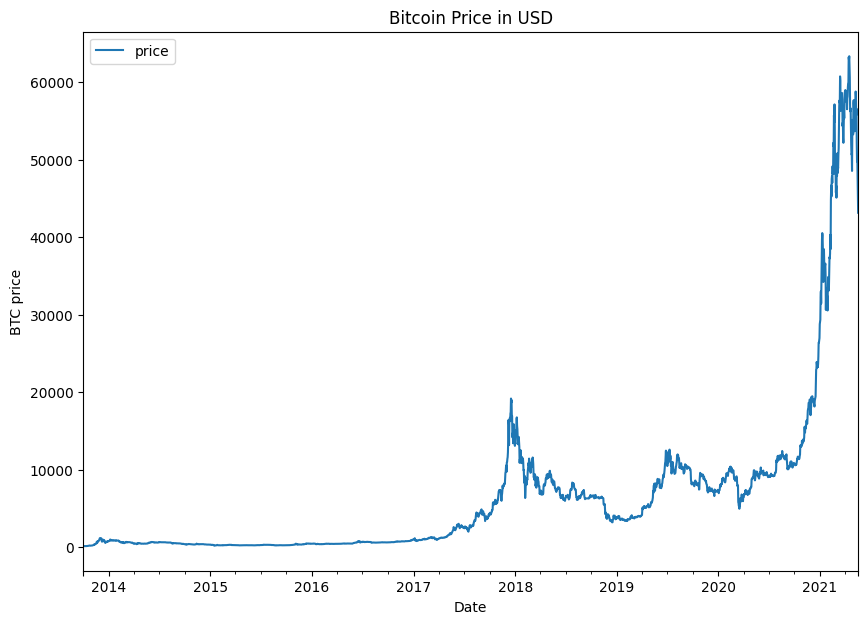

In [ ]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,7),title="Bitcoin Price in USD")
plt.ylabel("BTC price")


In [ ]:
import csv
from datetime import datetime


timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)

  for line in csv_reader:

    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Bitcoin Price in USD')

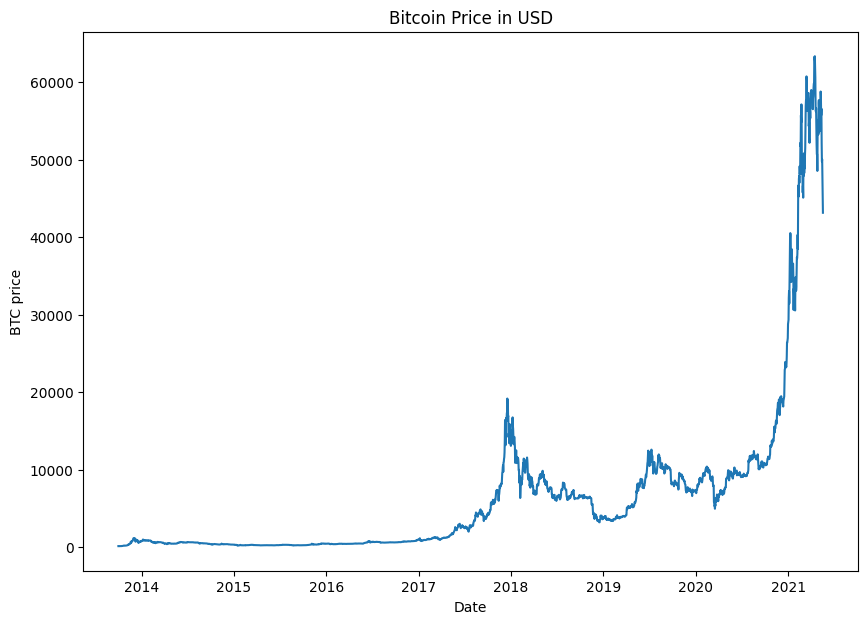

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC price")
plt.xlabel("Date")
plt.title("Bitcoin Price in USD")

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["price"].to_numpy()

In [ ]:
len(timesteps), len(prices)

(2787, 2787)

In [ ]:
split_size = int(len(timesteps) * 0.8)
split_size

2229

In [ ]:
#create train split
x_train, y_train = timesteps[:split_size], prices[:split_size]

#create test split
x_test, y_test = timesteps[split_size:], prices[split_size:]

len(x_train), len(y_train), len(x_test), len(y_test)

(2229, 2229, 558, 558)

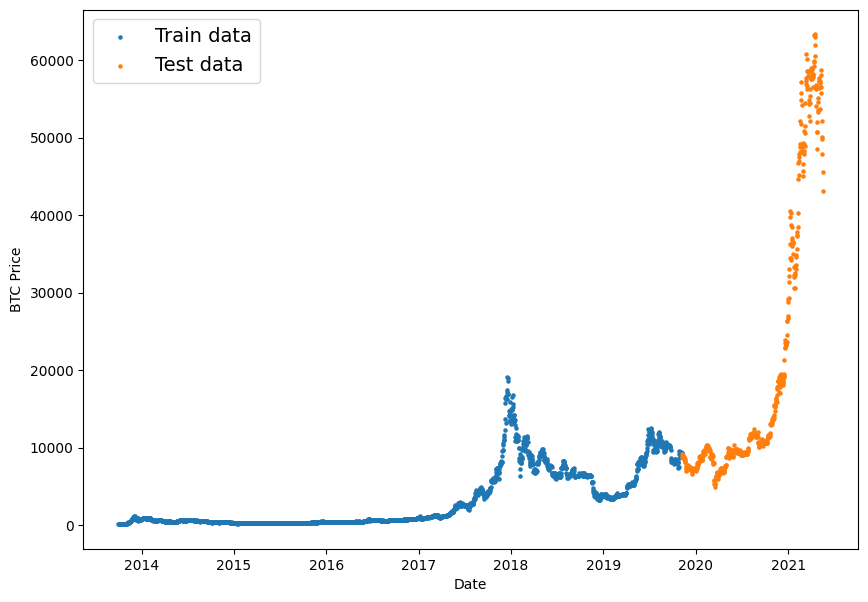

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(x_train, y_train, s=5, label="Train data")
plt.scatter(x_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();


In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

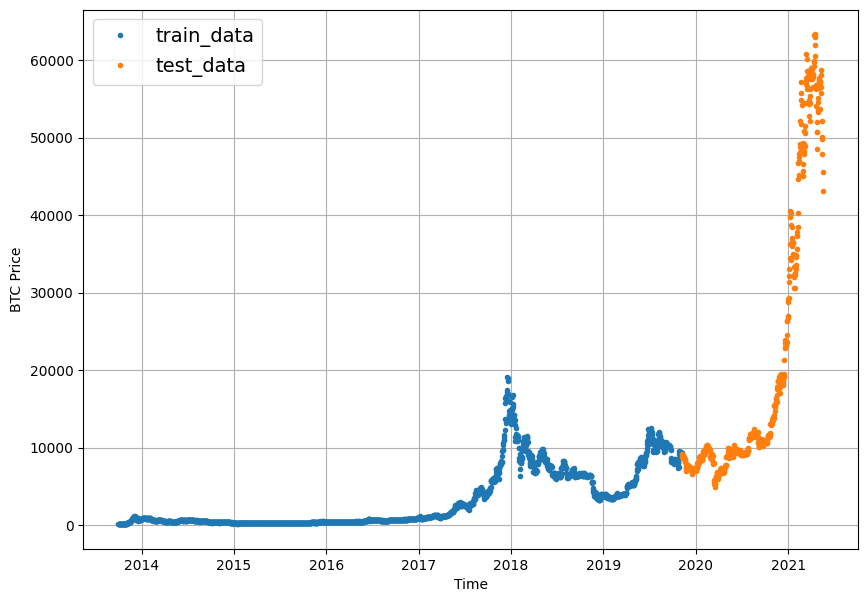

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_train, values=y_train, label="train_data")
plot_time_series(timesteps=x_test, values=y_test, label="test_data")

In [ ]:
#model :0 Naive Forecasting

naive_forecat = y_test[:-1]

In [ ]:
len(x_test[1:]), len(naive_forecat)

(557, 557)

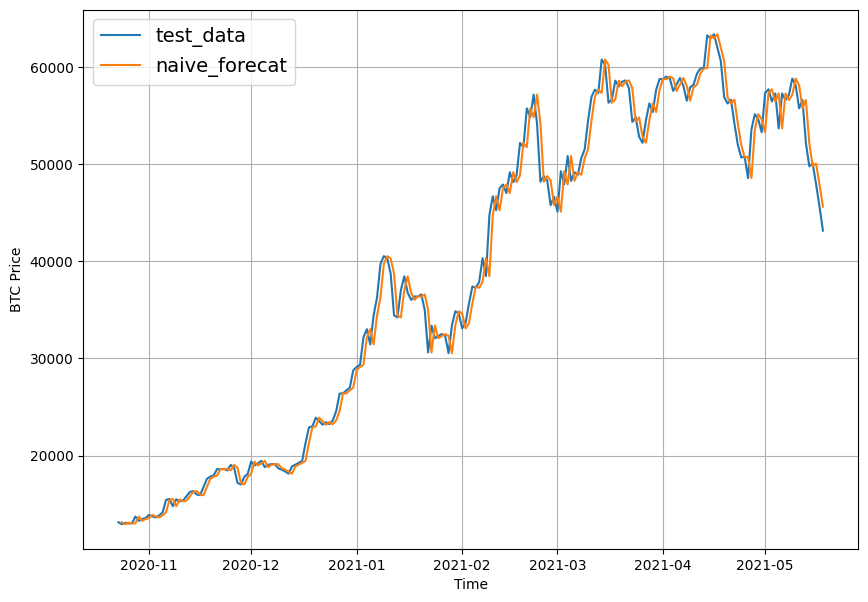

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=x_train, values=y_train, label="train_data")
plot_time_series(timesteps=x_test, values=y_test, start=350, format="-", label="test_data")
plot_time_series(timesteps=x_test[1:], values=naive_forecat, start=350, format="-", label="naive_forecat")

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecat).numpy()

0.9995699939182624

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.losses.MAE(y_true, y_pred)
  mse = tf.keras.losses.MSE(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.losses.MAPE(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecat)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
HORRIZON = 1
WINDOW_SIZE = 7

def get_labeled_windows(x, horizon=HORRIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORRIZON):

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_labeled_windows(windowed_array, horizon=horizon)

  return windows, labels

  # return x[window_indexes]

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORRIZON)

In [ ]:
prices[:10]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  , 123.033  , 124.049  , 125.96116])

In [ ]:
for i in range(3):
  print(f"window[{i}]: {full_windows[i]} --> label: {full_labels[i]}")

window[0]: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> label: [123.033]
window[1]: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> label: [124.049]
window[2]: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> label: [125.96116]


In [ ]:
# make train test split

def make_train_test_split(windows, labels, test_split=0.2):

  split_size = int(len(windows) * (1-test_split))

  train_windows = windows[:split_size]
  train_labels = labels[:split_size]

  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, train_labels, test_windows, test_labels

In [ ]:
train_windows, train_labels, test_windows, test_labels = make_train_test_split(full_windows, full_labels)

In [ ]:
train_windows.shape

(2224, 7)

In [ ]:
train_labels.shape

(2224, 1)

In [ ]:
#create model checkpoint

import os

def create_model_checkpoint(model_name, save_path="model_experiments"):

  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

In [ ]:
# model 1 : Dense model ( window 7, horizon 1)

import tensorflow as tf
from tensorflow.keras import layers


tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORRIZON, activation="linear"),
  ], name="model_1_dense")

In [ ]:
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [ ]:
model_1_history = model_1.fit(x=train_windows,
                             y=train_labels,
                             epochs=100,
                             verbose=1,
                             batch_size=128,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=f"{model_1.name}.keras")])

Epoch 1/100
18/18 [==============================] - 6s 61ms/step - loss: 1507.9910 - mae: 1507.9910 - mse: 7493313.5000 - val_loss: 1769.1012 - val_mae: 1769.1012 - val_mse: 8826610.0000
Epoch 2/100
18/18 [==============================] - 0s 21ms/step - loss: 372.0195 - mae: 372.0195 - mse: 548658.6875 - val_loss: 1932.7529 - val_mae: 1932.7529 - val_mse: 8904601.0000
Epoch 3/100
18/18 [==============================] - 1s 34ms/step - loss: 236.0237 - mae: 236.0237 - mse: 275425.8438 - val_loss: 1289.1509 - val_mae: 1289.1509 - val_mse: 4760396.0000
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 205.6252 - mae: 205.6252 - mse: 213633.8438 - val_loss: 1108.1581 - val_mae: 1108.1581 - val_mse: 3995556.0000
Epoch 5/100
18/18 [==============================] - 0s 20ms/step - loss: 197.0416 - mae: 197.0416 - mse: 203984.3438 - val_loss: 1089.5072 - val_mae: 1089.5072 - val_mse: 3779196.2500
Epoch 6/100
18/18 [==============================] - 0s 12ms/step - loss

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 685.1037 - mae: 685.1037 - mse: 1422016.7500


[685.1036987304688, 685.1036987304688, 1422016.75]

In [ ]:
# load the best performing model_1 and evaluate it on test data

loaded_model_1 = tf.keras.models.load_model("model_experiments/model_1_dense.keras")
loaded_model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 565.5656 - mae: 565.5656 - mse: 1159359.1250


[565.5655517578125, 565.5655517578125, 1159359.125]

In [ ]:
# make prediction using model (on test data)

def make_preds(model, input_data):

  forecast = model.predict(input_data)

  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(loaded_model_1, test_windows)
model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8847.701, 8765.928, 9035.037, 8781.707, 8732.026, 8753.171,
       8669.985, 8517.632, 8462.029, 8524.351], dtype=float32)>

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_1_preds)
model_1_results

{'mae': 565.5655,
 'mse': 1159359.1,
 'rmse': 1076.7355,
 'mape': 2.5167131,
 'mase': 0.9935419}

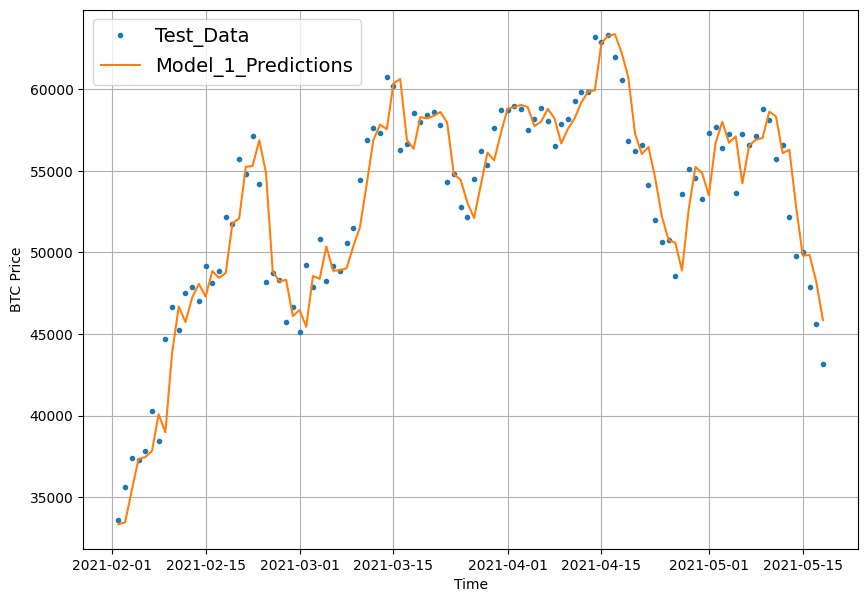

In [ ]:
# ploting model_1 predictions

offset = 450

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_Data")

plot_time_series(timesteps=x_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="Model_1_Predictions")

In [ ]:
# model 2 : Dense (window 30, Horizon 1)

HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORRIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
train_windows, train_labels, test_windows, test_labels = make_train_test_split(full_windows, full_labels, test_split=0.2)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2205, 2205, 552, 552)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORRIZON, activation="linear"),
  ], name="model_2_dense")

In [ ]:
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [ ]:
model_2_history = model_2.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=f"{model_2.name}.keras")]
                              )

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 1170.2075 - mae: 1170.2075 - mse: 5481495.0000 - val_loss: 3869.7510 - val_mae: 3869.7510 - val_mse: 31262030.0000
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 360.8952 - mae: 360.8952 - mse: 563280.5000 - val_loss: 1378.7733 - val_mae: 1378.7732 - val_mse: 6050459.5000
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 254.8380 - mae: 254.8380 - mse: 316213.4375 - val_loss: 1263.9939 - val_mae: 1263.9939 - val_mse: 5177255.5000
Epoch 4/100
18/18 [==============================] - 0s 9ms/step - loss: 224.2368 - mae: 224.2368 - mse: 244468.9062 - val_loss: 1199.0895 - val_mae: 1199.0895 - val_mse: 4570976.5000
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 206.4828 - mae: 206.4828 - mse: 218571.4531 - val_loss: 1166.4669 - val_mae: 1166.4669 - val_mse: 4516598.5000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 20

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 651.7830 - mae: 651.7830 - mse: 1398852.7500


[651.782958984375, 651.782958984375, 1398852.75]

In [ ]:
# load the best performing model_2

model_2_loaded = tf.keras.models.load_model("model_experiments/model_2_dense.keras")
model_2_loaded.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 625.9330 - mae: 625.9330 - mse: 1309694.2500


[625.9330444335938, 625.9330444335938, 1309694.25]

In [ ]:
model_2_preds = make_preds(model_2_loaded, test_windows)
model_2_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8847.214 , 8976.162 , 8793.754 , 8627.606 , 8318.99  , 8341.437 ,
       8285.743 , 8233.056 , 8199.912 , 7865.9473], dtype=float32)>

In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_2_preds)
model_2_results

{'mae': 625.933,
 'mse': 1309694.2,
 'rmse': 1144.4187,
 'mape': 2.8531818,
 'mase': 1.094137}

In [ ]:
model_1_results

{'mae': 565.5655,
 'mse': 1159359.1,
 'rmse': 1076.7355,
 'mape': 2.5167131,
 'mase': 0.9935419}

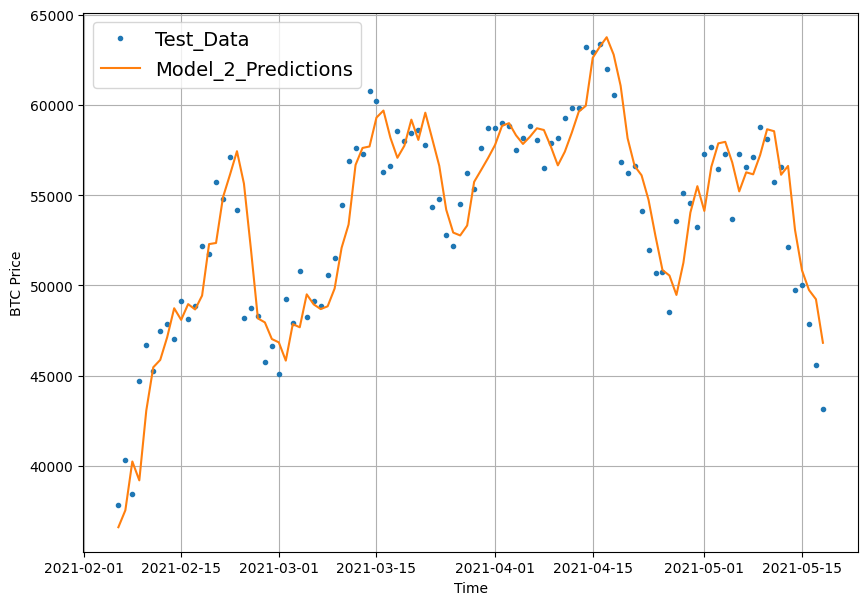

In [ ]:
# ploting model_1 predictions

offset = 450

plt.figure(figsize=(10, 7))
plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_Data")

plot_time_series(timesteps=x_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="Model_2_Predictions")

In [ ]:
# model 3 : Dense ( window 30, Horizon 7 )

HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, train_labels, test_windows, test_labels = make_train_test_split(full_windows, full_labels, test_split=0.2)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2200, 2200, 551, 551)

In [ ]:
train_windows[:1], train_labels[:1]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]]),
 array([[196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
         248.25333]]))

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear"),
  ], name="model_3_dense")

In [ ]:
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [ ]:
model_3_history = model_3.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=f"{model_3.name}.keras")]
                              )

Epoch 1/100
18/18 [==============================] - 1s 15ms/step - loss: 1873.7368 - mae: 1873.7368 - mse: 16488679.0000 - val_loss: 3754.1968 - val_mae: 3754.1968 - val_mse: 36697312.0000
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 557.9398 - mae: 557.9398 - mse: 1334706.8750 - val_loss: 2582.7129 - val_mae: 2582.7129 - val_mse: 18341402.0000
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 411.7629 - mae: 411.7629 - mse: 789227.4375 - val_loss: 2188.9570 - val_mae: 2188.9570 - val_mse: 13317528.0000
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 363.1320 - mae: 363.1320 - mse: 643567.1875 - val_loss: 1750.5710 - val_mae: 1750.5710 - val_mse: 9431052.0000
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 330.1154 - mae: 330.1154 - mse: 541205.0000 - val_loss: 1901.3647 - val_mae: 1901.3647 - val_mse: 10441026.0000
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - los

In [ ]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1388.1754 - mae: 1388.1754 - mse: 5994427.0000


[1388.1754150390625, 1388.1754150390625, 5994427.0]

In [ ]:
model_3_loaded = tf.keras.models.load_model("model_experiments/model_3_dense.keras")
model_3_loaded.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1255.2543 - mae: 1255.2543 - mse: 5527003.5000


[1255.2542724609375, 1255.2542724609375, 5527003.5]

In [ ]:
model_3_preds = make_preds(model_3_loaded, test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9353.869 , 9424.228 , 9590.093 , 9298.745 , 9449.915 , 9462.207 ,
        9515.094 ],
       [8985.    , 9161.3125, 9276.02  , 9147.431 , 9157.799 , 9234.895 ,
        9183.561 ],
       [8756.086 , 8926.282 , 9139.876 , 9104.603 , 9033.273 , 9243.765 ,
        8861.348 ],
       [8912.76  , 9164.753 , 9227.036 , 9352.009 , 9238.429 , 9417.076 ,
        8958.885 ],
       [8835.208 , 9165.858 , 9036.851 , 9293.857 , 9189.502 , 9247.623 ,
        8851.182 ]], dtype=float32)>

In [ ]:
model_3_preds.shape

TensorShape([551, 7])

In [ ]:
t = tf.squeeze(model_3_preds)
t.shape

TensorShape([551, 7])

In [ ]:
model_3_results = evaluate_preds(y_true=test_labels, y_pred=model_3_preds)
model_3_results

{'mae': 1255.2542,
 'mse': 5527004.0,
 'rmse': 1441.3732,
 'mape': 5.6889186,
 'mase': 2.233655}

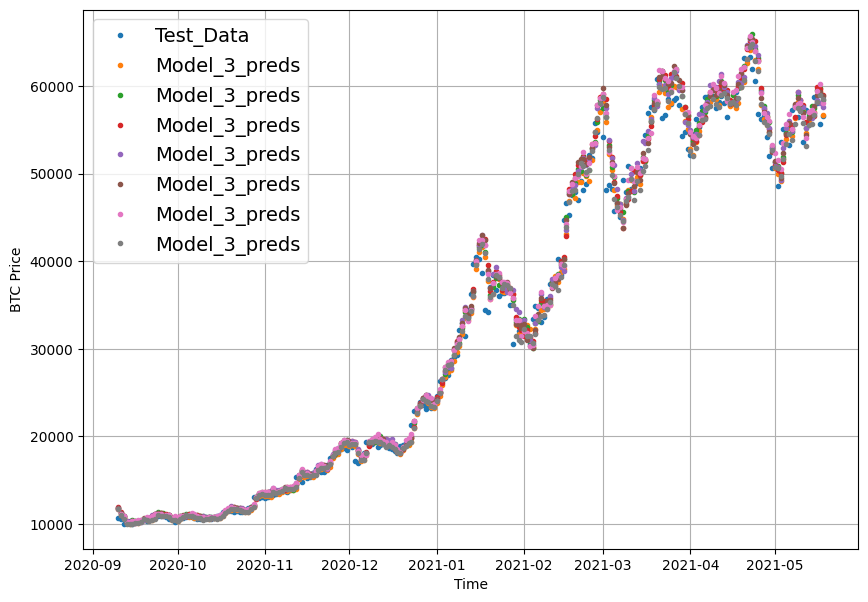

In [ ]:
offset = 300

plt.figure(figsize=(10, 7))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_Data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=model_3_preds, start=offset, label="Model_3_preds")

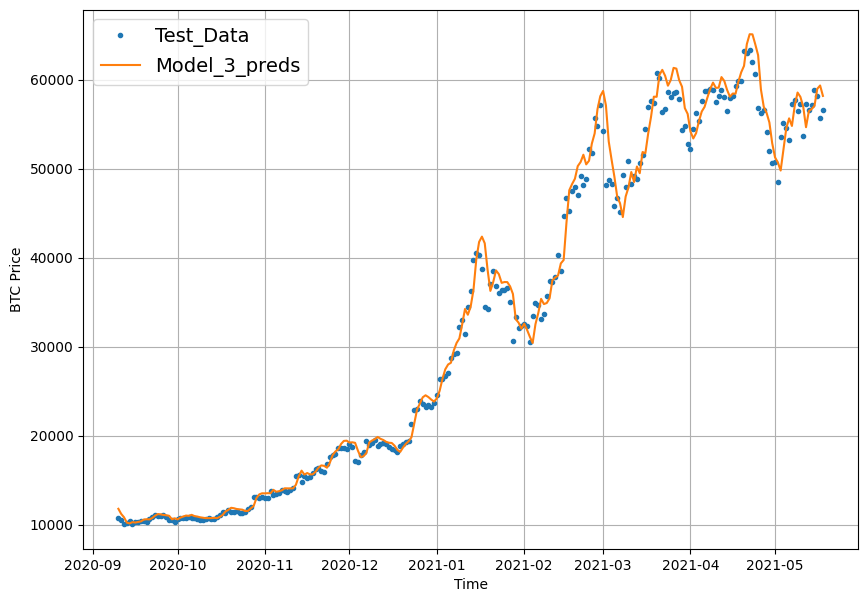

In [ ]:
offset = 300

plt.figure(figsize=(10, 7))

plot_time_series(timesteps=x_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_Data")
plot_time_series(timesteps=x_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format="-", start=offset, label="Model_3_preds")

<Axes: >

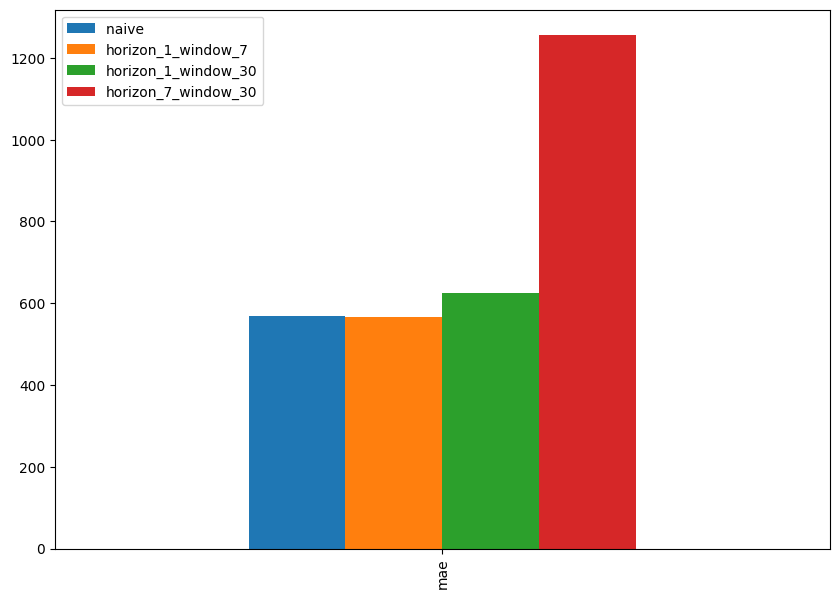

In [ ]:
# compare model results

pd.DataFrame({"naive ": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]
              }, index=["mae"]).plot(figsize=(10, 7), kind="bar")

In [ ]:
# model 4 : conv1D

HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_window, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_window), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, train_labels, test_windows, test_labels = make_train_test_split(full_window, full_labels, test_split=0.2)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_4_conv1D")

In [ ]:
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [ ]:
model_4_history = model_4.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              batch_size=128,
                              verbose=0,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=f"{model_4.name}.keras")])

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 668.3419 - mae: 668.3419 - mse: 1383477.3750


[668.3419189453125, 668.3419189453125, 1383477.375]

In [ ]:
model_4_loaded = tf.keras.models.load_model("model_experiments/model_4_conv1D.keras", safe_mode=False)
model_4_loaded.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 564.9572 - mae: 564.9572 - mse: 1165528.8750


[564.9572143554688, 564.9572143554688, 1165528.875]

In [ ]:
model_4_preds = make_preds(model_4_loaded, test_windows)
model_4_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8895.312, 8818.372, 9027.412, 8804.356, 8784.052], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_4_preds)
model_4_results

{'mae': 564.9573,
 'mse': 1165528.9,
 'rmse': 1079.5966,
 'mape': 2.5347013,
 'mase': 0.9924735}

In [ ]:
#model 5: RNN (LSTM)

tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(512, activation="relu", return_sequences=True)(x)
x = layers.LSTM(256, activation="relu", return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs, output, name="model_5_LSTM")

In [ ]:
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [ ]:
model_5_history = model_5.fit(x=train_windows,
                              y=train_labels,
                              epochs=100,
                              batch_size=128,
                              verbose=0,
                              validation_data=[test_windows, test_labels],
                              callbacks=[create_model_checkpoint(model_name=f"{model_5.name}.keras")])

In [ ]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 571.7272 - mae: 571.7272 - mse: 1176492.8750


[571.7271728515625, 571.7271728515625, 1176492.875]

In [ ]:
model_5_loaded = tf.keras.models.load_model("model_experiments/model_5_LSTM.keras", safe_mode=False)
model_5_loaded.evaluate(test_windows, test_labels)

18/18 [==============================] - 1s 3ms/step - loss: 566.1678 - mae: 566.1678 - mse: 1165920.1250


[566.1678466796875, 566.1678466796875, 1165920.125]

In [ ]:
model_5_preds = make_preds(model_5_loaded, test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8832.327, 8759.974, 8982.239, 8746.752, 8716.75 ], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_5_preds)
model_5_results

{'mae': 566.16785,
 'mse': 1165920.1,
 'rmse': 1079.7778,
 'mape': 2.5514913,
 'mase': 0.9946001}

In [ ]:
# the above data is univariate but we can add bit coin halving and make it multivariate

In [ ]:
#bitcoin halving events

block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

#block reward dates

block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

In [ ]:
#adding block reward

bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.head()

,price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


<Axes: xlabel='Date'>

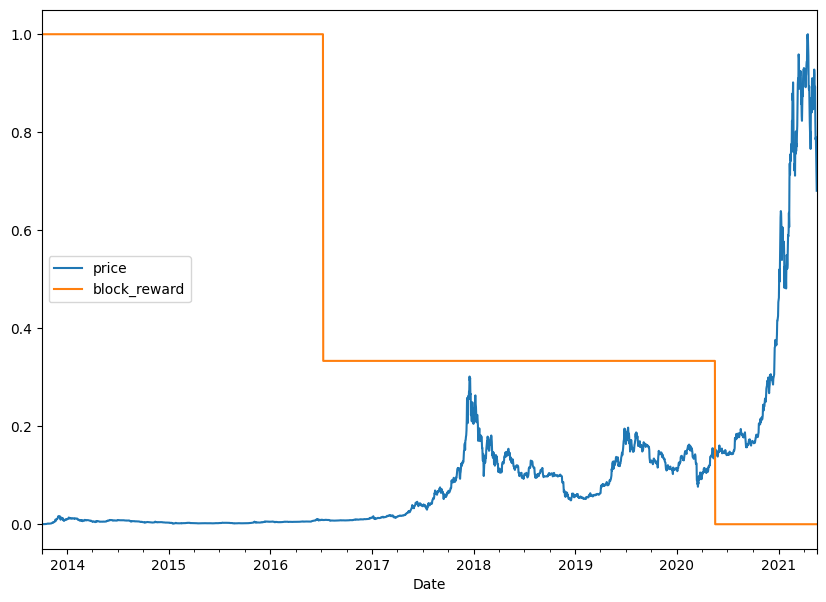

In [ ]:
#plot block reward vs price over time

from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

In [ ]:
bitcoin_price_windowed = bitcoin_prices_block.copy()

for i in range (WINDOW_SIZE):
  bitcoin_price_windowed[f"price{i+1}"] = bitcoin_price_windowed["price"].shift(periods=i+1)

bitcoin_price_windowed.head(10)

,price,block_reward,price1,price2,price3,price4,price5,price6,price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# create x(windows) and y(horizons)

x = bitcoin_price_windowed.dropna().drop("price", axis=1).astype(np.float32)
y = bitcoin_price_windowed.dropna()["price"].astype(np.float32)

In [ ]:
x.head()

,block_reward,price1,price2,price3,price4,price5,price6,price7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
# create training and testing sets

split_size = int(len(x) * 0.8)

x_train = x[:split_size]
y_train = y[:split_size]

x_test = x[split_size:]
y_test = y[split_size:]


In [ ]:
# make multivariate time series model

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
],name="model_6_dense_multivariate")

In [ ]:
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [ ]:
mopdel_6_history = model_6.fit(x=x_train,
                               y=y_train,
                               epochs=100,
                               verbose=1,
                               validation_data=[x_test,y_test],
                               callbacks=[create_model_checkpoint(model_name=f"{model_6.name}.keras")])

Epoch 1/100
70/70 [==============================] - 1s 6ms/step - loss: 780.6981 - mae: 780.6981 - mse: 3889872.5000 - val_loss: 1133.5320 - val_mae: 1133.5320 - val_mse: 4254228.0000
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 200.6819 - mae: 200.6819 - mse: 202944.7656 - val_loss: 1038.9370 - val_mae: 1038.9370 - val_mse: 3324999.2500
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 186.0375 - mae: 186.0375 - mse: 182188.1250 - val_loss: 1005.6445 - val_mae: 1005.6445 - val_mse: 3019069.5000
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 175.6253 - mae: 175.6253 - mse: 161192.9375 - val_loss: 899.6307 - val_mae: 899.6307 - val_mse: 2705235.0000
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 161.3178 - mae: 161.3178 - mse: 137065.8906 - val_loss: 852.6302 - val_mae: 852.6302 - val_mse: 2337831.2500
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 153.4426 -

In [ ]:
model_6.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 628.0466 - mae: 628.0466 - mse: 1286265.5000


[628.0465698242188, 628.0465698242188, 1286265.5]

In [ ]:
model_6_loaded = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate.keras")
model_6.evaluate(x_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 628.0466 - mae: 628.0466 - mse: 1286265.5000


[628.0465698242188, 628.0465698242188, 1286265.5]

In [ ]:
x_test.shape

(556, 8)

In [ ]:
x_test[:5]

,block_reward,price1,price2,price3,price4,price5,price6,price7
Date,,,,,,,,
2019-11-10,12.5,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039,9290.896484
2019-11-11,12.5,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930,9202.415039
2019-11-12,12.5,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609,9369.627930
2019-11-13,12.5,8711.534180,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953,9326.599609
2019-11-14,12.5,8760.892578,8711.534180,9081.186523,8798.041992,8794.358398,9226.485352,9335.751953


In [ ]:
model_6_preds = tf.squeeze(model_6_loaded.predict(x_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8838.242, 8779.947, 9055.215, 8752.733, 8730.165, 8766.627,
       8661.405, 8518.68 , 8463.184, 8532.513], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_6_preds)
model_6_results

{'mae': 566.0174,
 'mse': 1155566.4,
 'rmse': 1074.9728,
 'mape': 2.5128455,
 'mase': 0.9943358}

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers


    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"price_lag_{i+1}"] = bitcoin_prices_nbeats["price"].shift(periods=i+1)

bitcoin_prices_nbeats.head(10)

,price,price_lag_1,price_lag_2,price_lag_3,price_lag_4,price_lag_5,price_lag_6,price_lag_7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
x = bitcoin_prices_nbeats.dropna().drop("price", axis=1)
y = bitcoin_prices_nbeats.dropna()["price"]

split_size = int(len(x) * 0.8)

x_train = x[:split_size]
y_train = y[:split_size]

x_test = x[split_size:]
y_test = y[split_size:]

In [ ]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_labels_dataset  = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(x_test)
test_labels_dataset  = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset  = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024

train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset  = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
N_EPOCHS = 100 # original value in paper 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE*HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
 %%time

tf.random.set_seed(42)


nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")


stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

backcast, forecast = nbeats_block_layer(stack_input)
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

for i, _ in enumerate(range(N_STACKS-1)):

  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)

  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

CPU times: user 1min 10s, sys: 1.67 s, total: 1min 11s
Wall time: 1min 14s


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 26ms/step - loss: 594.4779 - mae: 594.4779 - mse: 1190366.6250


[594.4779052734375, 594.4779052734375, 1190366.625]

In [ ]:
model_7.preds = make_preds(model_7, test_dataset)
model_7.preds

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(556,), dtype=float32, numpy=
array([ 8853.004 ,  8775.396 ,  8921.494 ,  8695.62  ,  8699.    ,
        8673.632 ,  8594.99  ,  8453.4375,  8421.649 ,  8436.086 ,
        8218.922 ,  8124.7217,  8019.0005,  7676.018 ,  7359.5425,
        7242.425 ,  7053.305 ,  7129.7285,  7068.4844,  7420.409 ,
        7301.5864,  7678.8926,  7543.1616,  7346.049 ,  7282.386 ,
        7268.3022,  7151.656 ,  7279.445 ,  7386.1455,  7429.9946,
        7452.0166,  7313.7856,  7209.255 ,  7155.7036,  7135.0396,
        7142.784 ,  7059.56  ,  7051.323 ,  6888.591 ,  6642.0415,
        7247.331 ,  7111.5825,  7068.44  ,  7206.4385,  7254.2188,
        7071.31  ,  7154.0674,  7126.006 ,  7091.004 ,  7125.4688,
        7192.231 ,  7265.6953,  7173.5464,  7133.967 ,  7114.7153,
        6945.213 ,  7141.736 ,  7220.21  ,  7260.0557,  7660.5596,
        8030.6406,  8146.9043,  7881.065 ,  8010.1943,  8024.361 ,
        8041.6357,  7996.5024,  8700.843 ,  8874.278 ,  8741.2295,
        8899.3

In [ ]:
model_7_results = evaluate_preds(y_true=y_test, y_pred=model_7.preds)
model_7_results

{'mae': 594.4779,
 'mse': 1190366.6,
 'rmse': 1091.0392,
 'mape': 2.7467139,
 'mase': 1.044333}

In [ ]:
model_7.summary()

Model: "model_7_N-BEATS"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 stack_input (InputLayer)    [(None, 7)]                  0         []                            
                                                                                                  
 InitialBlock (NBeatsBlock)  ((None, 7),                  796168    ['stack_input[0][0]']         
                              (None, 1))                                                          
                                                                                                  
 subtract_00 (Subtract)      (None, 7)                    0         ['stack_input[0][0]',         
                                                                     'InitialBlock[0][0]']        
                                                                                    

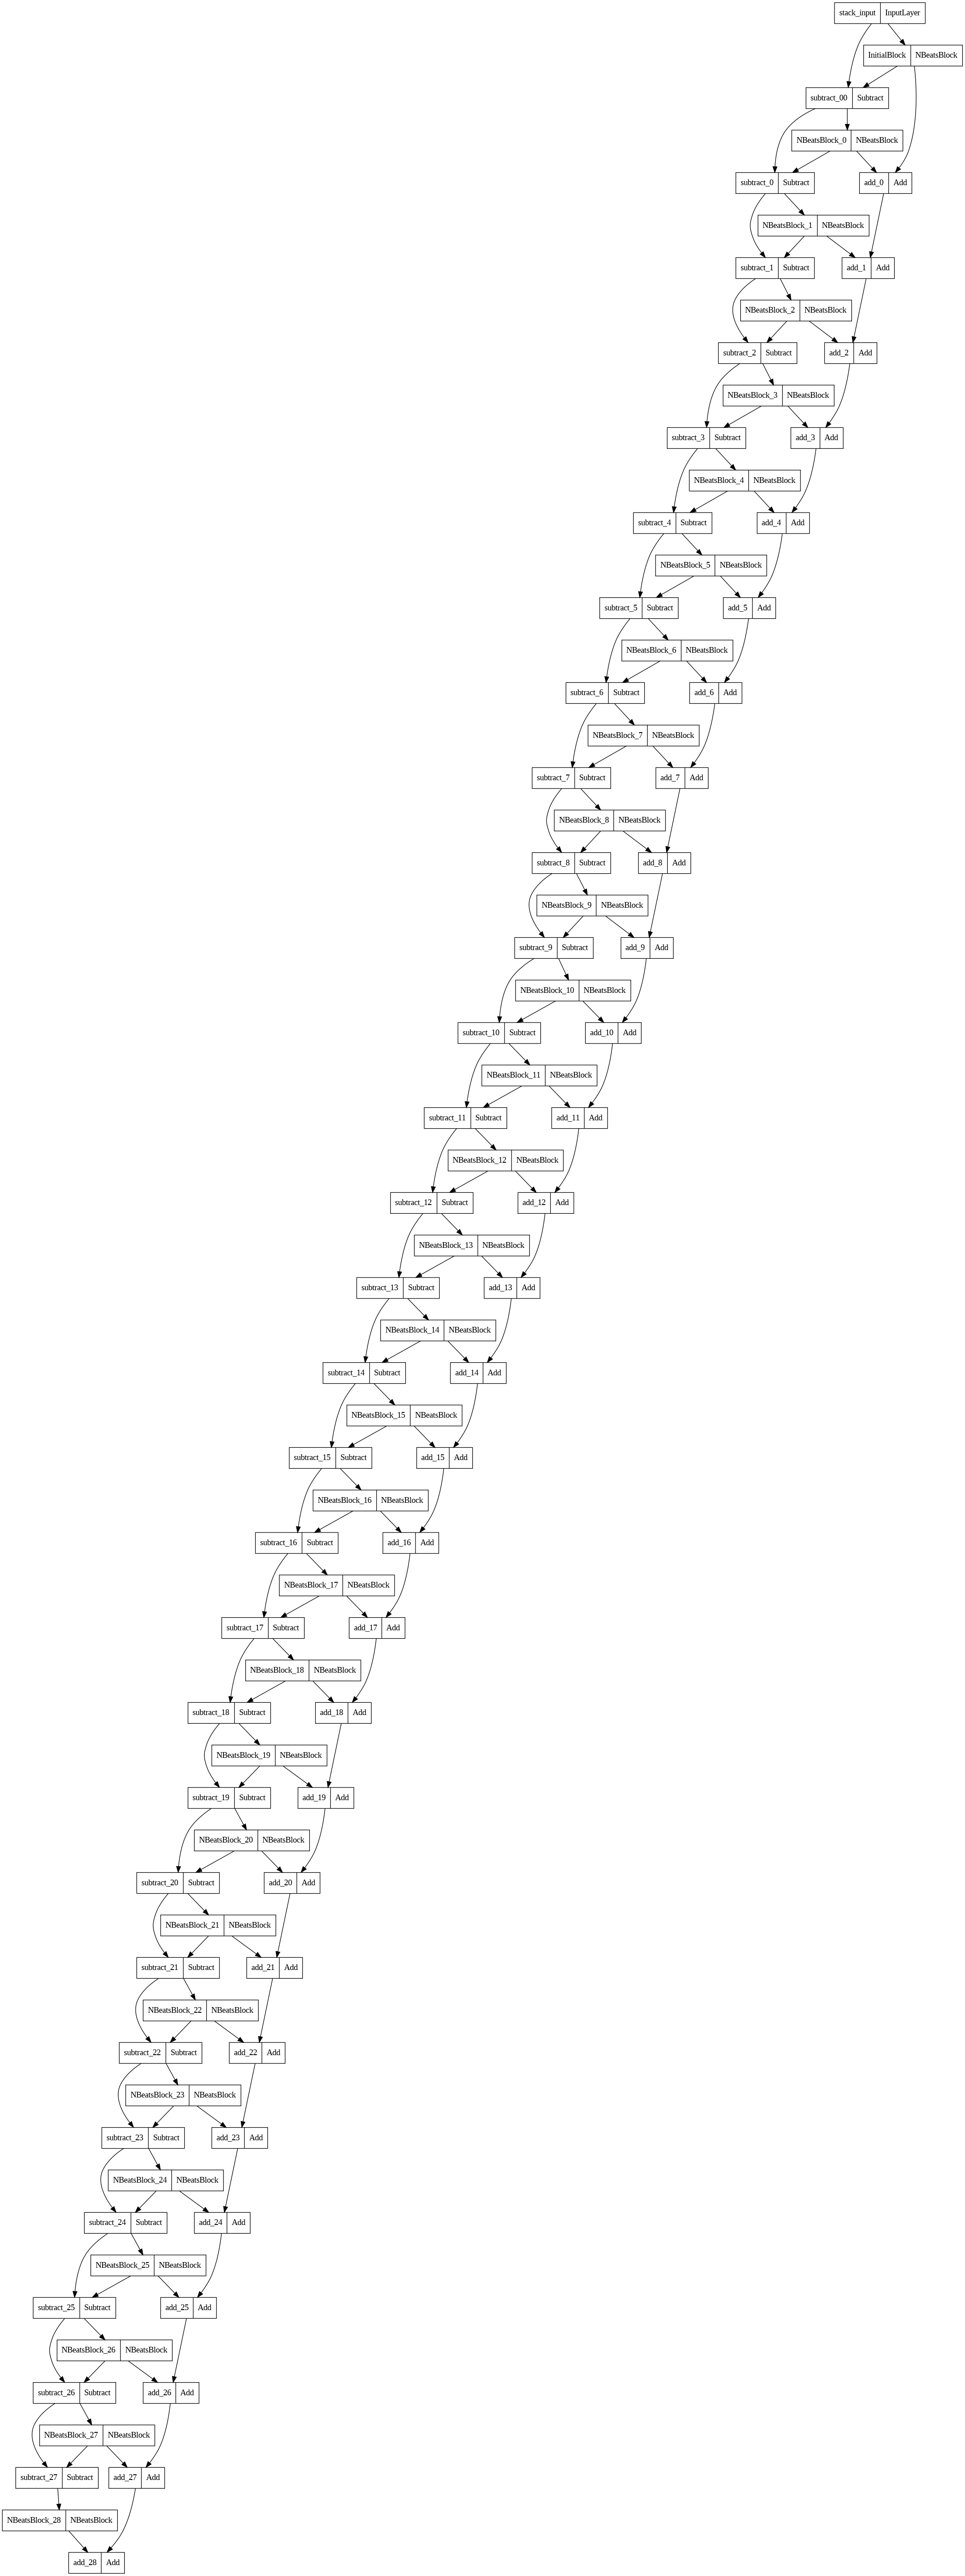

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_7)

In [ ]:
# model 8 : Creating an ensemble (stacking diffirent models together)

def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):

  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"optimizing model by reducing {loss_function} for {num_epochs} epochs, model number: {i}")

      model = tf.keras.Sequential([
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                          tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])

      ensemble_models.append(model)
  return ensemble_models

In [ ]:
ensembel_models = get_ensemble_models(num_iter=5, num_epochs=1000)

optimizing model by reducing mae for 1000 epochs, model number: 0

Epoch 903: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
optimizing model by reducing mse for 1000 epochs, model number: 0

Epoch 796: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 896: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing mape for 1000 epochs, model number: 0

Epoch 171: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 271: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing mae for 1000 epochs, model number: 1
optimizing model by reducing mse for 1000 epochs, model number: 1

Epoch 583: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 683: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
optimizing model by reducing mape for 1000 epochs, model number: 1

Epoch 209: ReduceLROnPlateau reducing lea

In [ ]:
def make_ensemble_preds(ensembel_models, data):
  ensembel_preds = []
  for model in ensembel_models:
    preds = model.predict(data)
    ensembel_preds.append(preds)
  return tf.constant(tf.squeeze(ensembel_preds))

In [ ]:
ensemble_preds = make_ensemble_preds(ensembel_models, test_dataset)
ensemble_preds.shape

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 39ms/step


TensorShape([15, 556])

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean.shape

TensorShape([556])

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median.shape

(556,)

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test, y_pred=ensemble_mean)
ensemble_results

{'mae': 567.3574,
 'mse': 1146595.5,
 'rmse': 1070.792,
 'mape': 2.569964,
 'mase': 0.99668986}

In [ ]:
ensemble_results = evaluate_preds(y_true=y_test, y_pred=ensemble_median)
ensemble_results

{'mae': 568.5372,
 'mse': 1159296.5,
 'rmse': 1076.7063,
 'mape': 2.5781794,
 'mase': 0.9987623}

In [ ]:
# find upper and lower bounds of ensemble

def get_upper_lower(preds):

  std = tf.math.reduce_std(preds, axis=0)

  interval = 1.96 * std

  preds_mean = tf.math.reduce_mean(preds, axis=0)

  upper = preds_mean + interval
  lower = preds_mean - interval

  return lower, upper

In [ ]:
lower, upper = get_upper_lower(ensemble_preds)

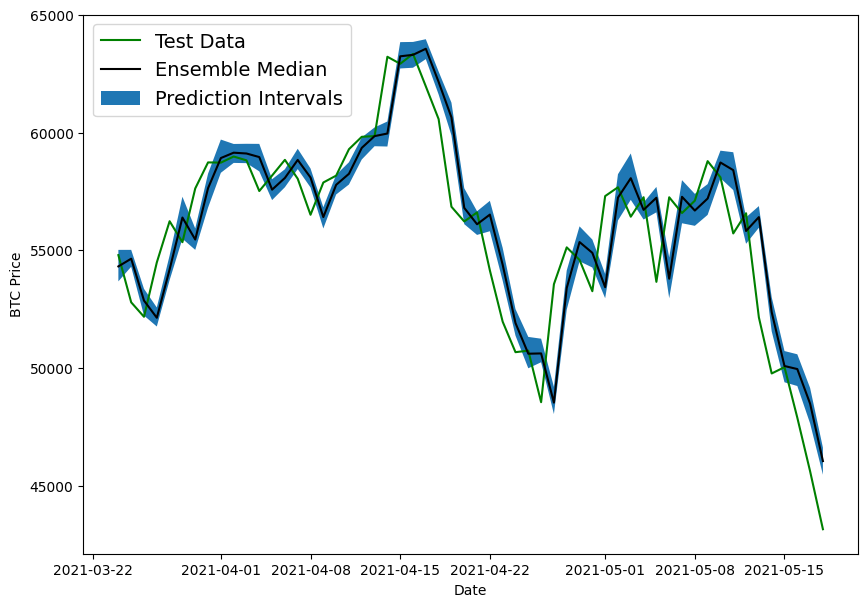

In [ ]:

offset=500
plt.figure(figsize=(10, 7))
plt.plot(x_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(x_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(x_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [ ]:
#model 9 : using all the available data to train the model

bitcoin_price_windowed.head()

,price,block_reward,price1,price2,price3,price4,price5,price6,price7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
x_all = bitcoin_price_windowed.dropna().drop(["price", "block_reward"], axis=1).to_numpy()

y_all = bitcoin_price_windowed.dropna()["price"].to_numpy()

len(x_all), len(y_all)

(2780, 2780)

In [ ]:
features_dataset_all = tf.data.Dataset.from_tensor_slices(x_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

BATCH_SIZE =1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
],name="model_9")

model_9.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_9.fit(dataset_all,
            epochs=100,
            verbose=0,
            )

In [ ]:
INTO_FUTURE = 14

In [ ]:
# make preddictions into the future

def make_future_forecast(values, model, into_future = INTO_FUTURE, window_size=WINDOW_SIZE) -> list:

  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  for _ in range(into_future):

    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())

    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [ ]:
bitcoin_price_windowed.tail()

,price,block_reward,price1,price2,price3,price4,price5,price6,price7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
future_forecast = make_future_forecast(values=y_all, model=model_9, into_future = INTO_FUTURE, window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 64ms/step
Predicting on: 
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55935.2578125

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55935.2578125 ] -> Prediction: 52324.140625

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55935.2578125  52324.140625  ] -> Prediction: 48517.71875

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55935.2578125  52324.140625   48517.71875   ] -> Prediction: 48804.99609375

1/1 [==============================] - 0s 18ms/step
Predicting on: 
 [47885.62525472 45604.61575361 43144.47129086 55935.2578125
 52324.140625   48517.71875    48804.99609375

In [ ]:
future_forecast

[55935.258,
 52324.14,
 48517.72,
 48804.996,
 46638.434,
 47659.13,
 48207.91,
 54700.043,
 51268.54,
 47425.066,
 48358.05,
 47631.23,
 49781.152,
 50726.684]

In [ ]:
def get_future_dates(start_date, into_future, offset=1):

  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55935.258, 52324.14 , 48517.72 , 48804.996, 46638.434,
        47659.13 , 48207.91 , 54700.043, 51268.54 , 47425.066, 48358.05 ,
        47631.23 , 49781.152, 50726.684], dtype=float32))

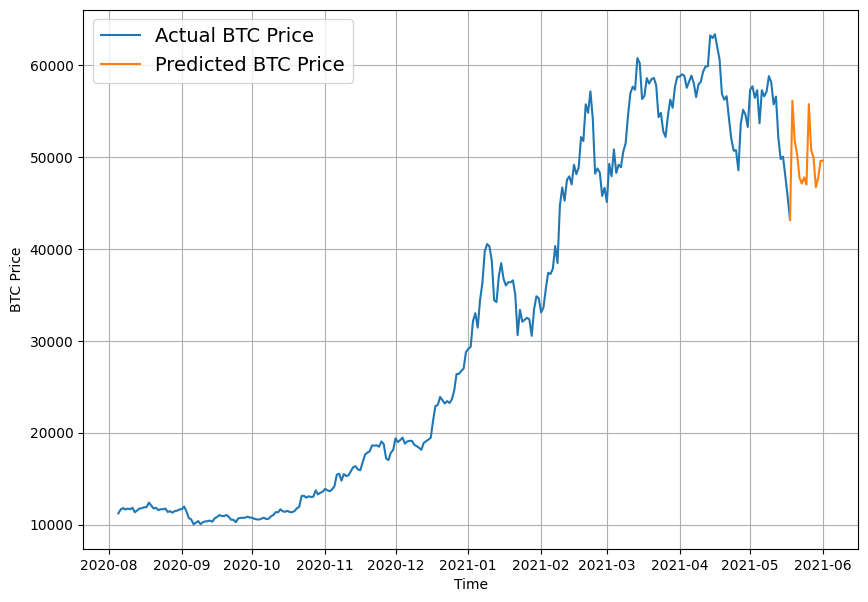

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

In [ ]:
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1147547.000,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,565.565491,1159359.125,1076.735474,2.516713,0.993542
model_2_dense_w30_h1,625.932983,1309694.250,1144.418701,2.853182,1.094137
model_3_dense_w30_h7,1255.254150,5527004.000,1441.373169,5.688919,2.233655
model_4_CONV1D,564.957275,1165528.875,1079.596558,2.534701,0.992473
model_5_LSTM,566.167847,1165920.125,1079.777832,2.551491,0.994600
model_6_multivariate,566.017395,1155566.375,1074.972778,2.512846,0.994336
model_8_NBEATs,594.477905,1190366.625,1091.039185,2.746714,1.044333
model_9_ensemble,567.357422,1146595.500,1070.791992,2.569964,0.996690


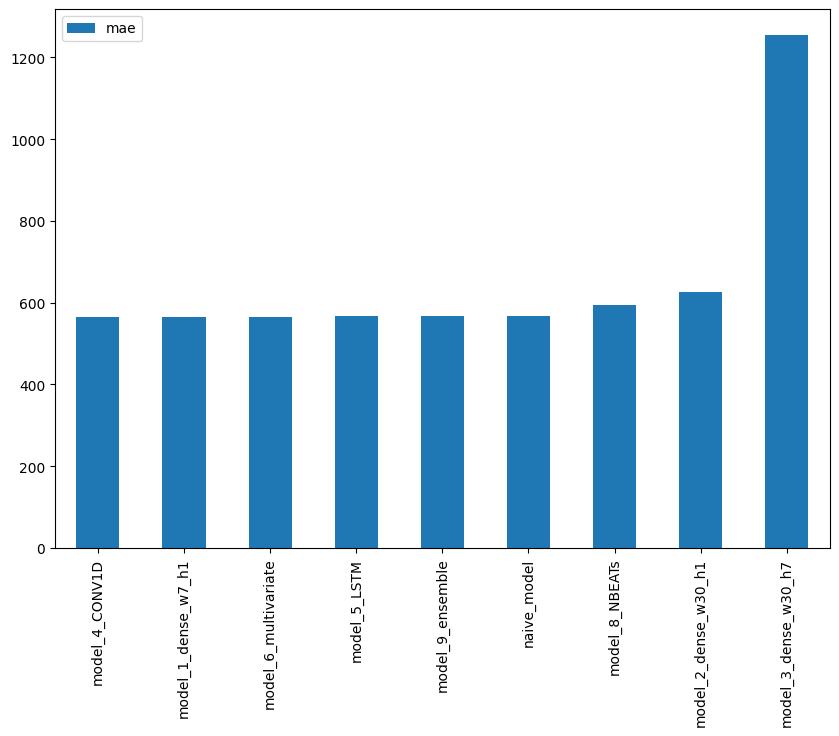

In [ ]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");